In [1]:
import tensorflow as tf
from tensorflow import keras
(train_data, train_targets), (test_data, test_targets) =keras.datasets.boston_housing.load_data()

In [2]:
train_data.shape

(404, 13)

404개의 data points <br>
13개의 독립변수

In [3]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [4]:
train_targets[:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

종속변수는 미국 Boston에 속한 도시들의 70년대 중반 집들의 중간값 <br>
data point는 도시 <br>
독립변수는 범죄율, 평균 소득 등 <br>
10 = > $ 10K

데이터 표준화하기

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [8]:
train_data.shape[1]

13

In [9]:
model = models.Sequential()
# 입력층을 별도로 추가하지 않는다!
model.add(layers.Dense(64, activation = 'relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1))

In [10]:
# ReLU 클래스와 LeakyReLU 클래스 사용해서 활성화함수 추가해 보기

# model = models.Sequential()
# model.add(layers.Dense(64, input_shape=(train_data.shape[1],)))
# model.add(layers.ReLU())
# model.add(layers.Dense(64))
# model.add(layers.LeakyReLU(alpha=0.01))
# model.add(layers.Dense(1))

In [11]:
# 다음과 같이 활성화 함수를 추가하는 것도 가능함
# from tensorflow.keras import activations

# model = models.Sequential()
# model.add(layers.Dense(64, input_shape=(train_data.shape[1],)))
# model.add(model.add(layers.Activation(activations.relu)))

# 보다 자세한 내용은 https://keras.io/api/layers/activations/

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


- output shape의 None은 sample size를 뜻하는데 미니배치 방식으로 경사하강법을 시행할 시, 배치의 크기 (즉, 샘플의 개수)가 그 자리에 들어가게 됨
- 첫 번째 파라미터 값(896)의 경우, 14(편향노드 포함) * 64(편향노드 포함 X)의 결과로 도출된 것
- 두 번째 파라미터 값은 65(편향노드 포함) * 64

종속변수가 연속변수이기 때문에 마지막 layer에는 node가 하나밖에 없다. 

In [13]:
# Optimizer 종류 => https://keras.io/api/optimizers/
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

In [14]:
model.compile(optimizer=adam, loss='mse')

In [15]:
# model.fit(train_data, train_targets, epochs=80, batch_size=16 -> 전통적으로는 2의 배수를 사용)
history = model.fit(train_data, train_targets, epochs=80, batch_size=10, validation_split=0.2)

Epoch 1/80
33/33 [==============================] - 3s 64ms/step - loss: 562.0264 - val_loss: 489.1145
Epoch 2/80
33/33 [==============================] - 0s 3ms/step - loss: 343.5942 - val_loss: 223.1961
Epoch 3/80
33/33 [==============================] - 0s 3ms/step - loss: 109.1315 - val_loss: 97.8012
Epoch 4/80
33/33 [==============================] - 0s 3ms/step - loss: 68.3143 - val_loss: 63.7535
Epoch 5/80
33/33 [==============================] - 0s 3ms/step - loss: 41.2718 - val_loss: 46.2318
Epoch 6/80
33/33 [==============================] - 0s 3ms/step - loss: 25.1535 - val_loss: 37.1272
Epoch 7/80
33/33 [==============================] - 0s 3ms/step - loss: 28.1174 - val_loss: 30.7548
Epoch 8/80
33/33 [==============================] - 0s 3ms/step - loss: 23.7167 - val_loss: 27.0990
Epoch 9/80
33/33 [==============================] - 0s 3ms/step - loss: 23.0470 - val_loss: 23.8563
Epoch 10/80
33/33 [==============================] - 0s 3ms/step - loss: 18.5402 - val_loss: 2

In [16]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

## Loss 값 변화 살펴보기

In [17]:
import matplotlib.pyplot as plt

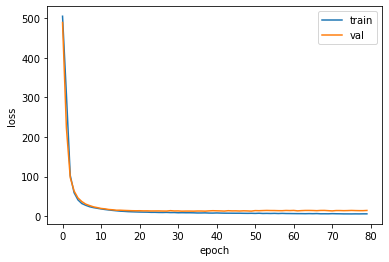

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 성능 평가하기

In [19]:
from sklearn.metrics import r2_score

In [20]:
y_pred = model.predict(test_data)
r2_score(test_targets, y_pred)

0.7332139179325152